In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

path = '/Users/hsy/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

In [2]:
filename = '../data/성적.csv'
df = pd.read_csv(filename, encoding='cp949')

In [3]:
df

,name,midexam,finalexam
0,이순신,60,70
1,김유신,65,75
2,신사임당,45,65
3,윤봉길,70,40
4,이봉창,75,55


left_label
['이순신(60점)', '김유신(65점)', '신사임당(45점)', '윤봉길(70점)', '이봉창(75점)']


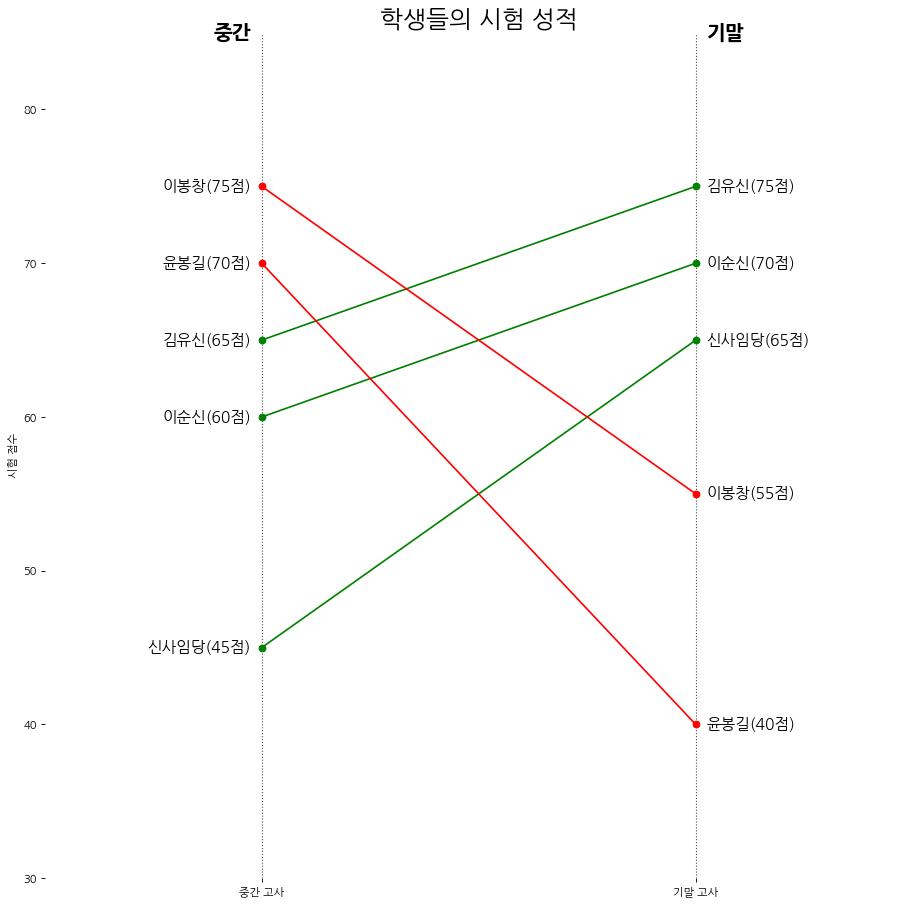

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(14, 14), dpi= 80)

HUNDRED = 80 # 만점 점수
MIN_HEIGHT = 30
MAX_HEIGHT = HUNDRED + 5

# 수직선 그리기
ax.vlines(x=1, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=MIN_HEIGHT, ymax=MAX_HEIGHT, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# 각 시험 점수들에 대한 점 그리기
ax.scatter(y=df['midexam'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['finalexam'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
idx = 0

left_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['midexam'])]
print('left_label')
print(left_label)

right_label = [str(c) + '(' + str(round(y)) + '점)' for c, y in zip(df.name, df['finalexam'])]

import matplotlib.lines as mlines

# 중간 고사와 기말 고사간의 연결선을 그려 주는 함수
def newline(p1, p2):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], 
                      color='red' if p1[1]-p2[1] > 0 else 'green', 
                      marker='o', markersize=6)
    ax.add_line(l)
    return l

for p1, p2 in zip(df['midexam'], df['finalexam']):
    newline([1, p1], [3, p2]) # 연결선을 그려 주고
    # 선들에 대한 caption 작성하기
    ax.text(1-0.05, p1, left_label[idx], horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, right_label[idx], horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    idx = idx + 1
    
# '중간'과 '기말' Annotations 작성하기
ax.text(1-0.05, HUNDRED + 5, '중간', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, HUNDRED + 5, '기말', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
    
# Decoration
ax.set_title('학생들의 시험 성적', fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(MIN_HEIGHT, MAX_HEIGHT), ylabel='시험 점수')

# 하단의 x축에 대한 ticks 작성
ax.set_xticks([1, 3])
ax.set_xticklabels(['중간 고사', '기말 고사'])    

# 그래프 영역의 테두리 선(borders) 없애기
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)


In [17]:
from matplotlib import cbook, colors as mcolors
from matplotlib.image import AxesImage
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox, TransformedBbox, BboxTransformTo

In [18]:
filename = '../data/주요발생국가주간동향(4월2째주).csv'

class RibbonBox:
    original_image = plt.imread(
        cbook.get_sample_data("Minduka_Present_Blue_Pack.png"))
    cut_location = 70
    b_and_h = original_image[:, :, 2:3]
    color = original_image[:, :, 2:3] - original_image[:, :, 0:1]
    alpha = original_image[:, :, 3:4]
    nx = original_image.shape[1]

    def __init__(self, color):
        rgb = mcolors.to_rgba(color)[:3]
        self.im = np.dstack(
            [self.b_and_h - self.color * (1 - np.array(rgb)), self.alpha])

    def get_stretched_image(self, stretch_factor):
        stretch_factor = max(stretch_factor, 1)
        ny, nx, nch = self.im.shape
        ny2 = int(ny*stretch_factor)
        return np.vstack(
            [self.im[:self.cut_location],
             np.broadcast_to(
                 self.im[self.cut_location], (ny2 - ny, nx, nch)),
             self.im[self.cut_location:]])
# end class RibbonBox:

class RibbonBoxImage(AxesImage):
    zorder = 1

    def __init__(self, ax, bbox, color, *, extent=(0, 1, 0, 1), **kwargs):
        super().__init__(ax, extent=extent, **kwargs)
        self._bbox = bbox
        self._ribbonbox = RibbonBox(color)
        self.set_transform(BboxTransformTo(bbox))

    def draw(self, renderer, *args, **kwargs):
        stretch_factor = self._bbox.height / self._bbox.width

        ny = int(stretch_factor*self._ribbonbox.nx)
        if self.get_array() is None or self.get_array().shape[0] != ny:
            arr = self._ribbonbox.get_stretched_image(stretch_factor)
            self.set_array(arr)

        super().draw(renderer, *args, **kwargs)
# end class RibbonBoxImage(AxesImage):

def main():
    fig, ax = plt.subplots()

    data = pd.read_csv(filename, index_col='국가')

    koreadata = data.loc['한국', '4월06일':'4월10일']
    print('koreadata.index')
    print(koreadata.index)

    chartdata = [koreadata[item] for item in koreadata.index]
    print('chartdata')
    print(chartdata) # 그리고자 하는 데이터

    xdata = np.arange(0, len(chartdata))
    print('xdata')
    print(xdata)

    box_colors = [
        (0.8, 0.2, 0.2),
        (0.2, 0.8, 0.2),
        (0.2, 0.2, 0.8),
        (0.7, 0.5, 0.8),
        (0.3, 0.8, 0.7),
    ]

    for x, h, bc in zip(xdata, chartdata, box_colors):
        bbox0 = Bbox.from_extents(x - 0.4, 0., x + 0.4, h)
        bbox = TransformedBbox(bbox0, ax.transData)
        # 리본 이미지 넣기
        ax.add_artist(RibbonBoxImage(ax, bbox, bc, interpolation="bicubic"))
        # 상단의 수치 데이터를 콤마 유형으로 표시
        ax.annotate('%s' % format(h,','), (x, h), va="bottom", ha="center")

    ax.set_xlim(xdata[0] - 0.5, xdata[-1] + 0.5)
    ax.set_ylim(0, 12000)

    myxticks = [item for item in koreadata.index]
    ax.set_xticks(xdata)
    ax.set_xticklabels(myxticks) # x축에 놓을 문자열
    ax.set_title('한국 코로나 발생 현황(Ribbon Box)')

    # 배경 색상을 지정합니다.
    background_gradient = np.zeros((2, 2, 4))
    background_gradient[:, :, :3] = [1, 1, 0]
    background_gradient[:, :, 3] = [[0.1, 0.3], [0.3, 0.5]]  # alpha channel
    ax.imshow(background_gradient, interpolation="bicubic", zorder=0.1,
              extent=(0, 1, 0, 1), transform=ax.transAxes, aspect="auto")

koreadata.index
Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일'], dtype='object')
chartdata
[10284, 10331, 10384, 10423, 10450]
xdata
[0 1 2 3 4]


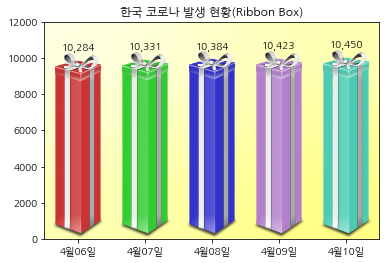

In [19]:
main()

In [20]:
filename = '../data/welfareClean.csv'
welfare = pd.read_csv(filename, encoding='cp949')

Text(0.5, 0.98, '제목')

<Figure size 1280x800 with 0 Axes>

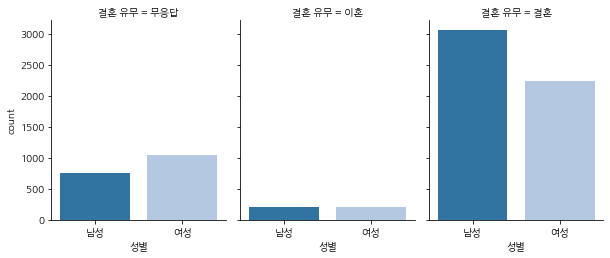

In [21]:
fig = plt.figure(figsize=(16, 10), dpi= 80)

sns.catplot('성별', col='결혼 유무', col_wrap=3,
                data=welfare, kind="count", height=3.5,
                aspect=.8, palette='tab20')

fig.suptitle('제목')

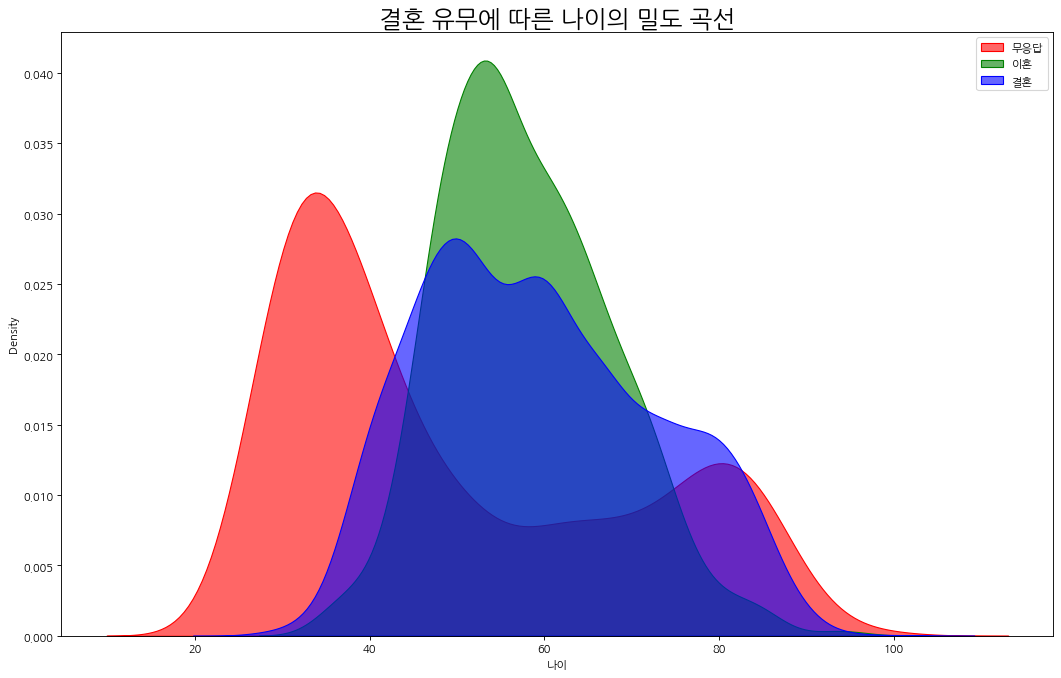

In [22]:
plt.figure(figsize=(16,10), dpi= 80)
MY_ALPHA = 0.6
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '무응답', '나이'], shade=True, color="r", label="무응답", alpha=MY_ALPHA)
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '이혼', '나이'], shade=True, color="g", label="이혼", alpha=MY_ALPHA)
sns.kdeplot(welfare.loc[welfare['결혼 유무'] == '결혼', '나이'], shade=True, color="b", label="결혼", alpha=MY_ALPHA)

plt.title('결혼 유무에 따른 나이의 밀도 곡선', fontsize=22)
plt.legend()

In [23]:
df = welfare[['소득', '지역구']].groupby('지역구').apply(lambda x: x.mean())
df.sort_values('소득', inplace=True)
df.reset_index(inplace=True)

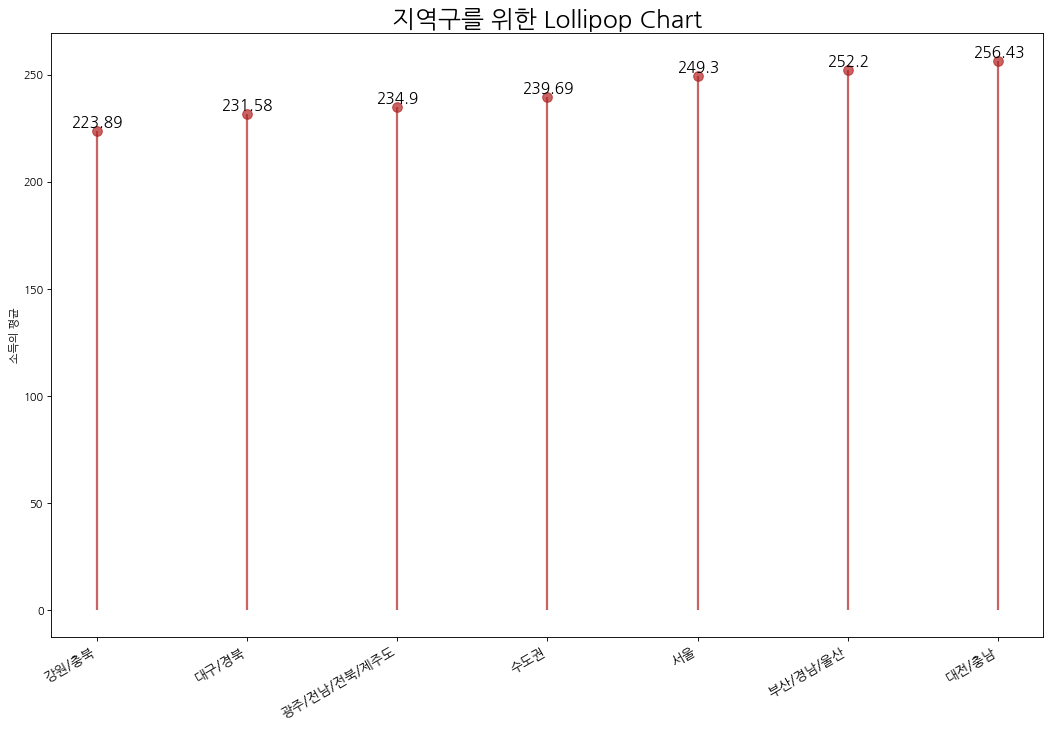

In [25]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)

# 수직선
ax.vlines(x=df.index, ymin=0, ymax=df.소득, color='firebrick', alpha=0.7, linewidth=2)

# 상단의 점
ax.scatter(x=df.index, y=df.소득, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('지역구를 위한 Lollipop Chart', fontdict={'size':22})
ax.set_ylabel('소득의 평균')
ax.set_xticks(df.index)
ax.set_xticklabels(df.지역구.str.lower(), rotation=30, fontdict={'horizontalalignment': 'right', 'size':12})

# 상단에 그려 주는 소득 정보 텍스트
for row in df.itertuples():
    ax.text(row.Index, row.소득+.5, s=round(row.소득, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

In [26]:
for x in df.itertuples():
    print(x)

Pandas(Index=0, 지역구='강원/충북', 소득=223.89156662560777)
Pandas(Index=1, 지역구='대구/경북', 소득=231.57620417587376)
Pandas(Index=2, 지역구='광주/전남/전북/제주도', 소득=234.90174206240712)
Pandas(Index=3, 지역구='수도권', 소득=239.69295311491445)
Pandas(Index=4, 지역구='서울', 소득=249.30302792714028)
Pandas(Index=5, 지역구='부산/경남/울산', 소득=252.19515232520322)
Pandas(Index=6, 지역구='대전/충남', 소득=256.43385100979026)


([<matplotlib.axis.XTick at 0x7fe9011bb128>,
 [Text(0, 0, '강원/충북'),
  Text(1, 0, '대구/경북'),
  Text(2, 0, '광주/전남/전북/제주도'),
  Text(3, 0, '수도권'),
  Text(4, 0, '서울'),
  Text(5, 0, '부산/경남/울산'),
  Text(6, 0, '대전/충남')])

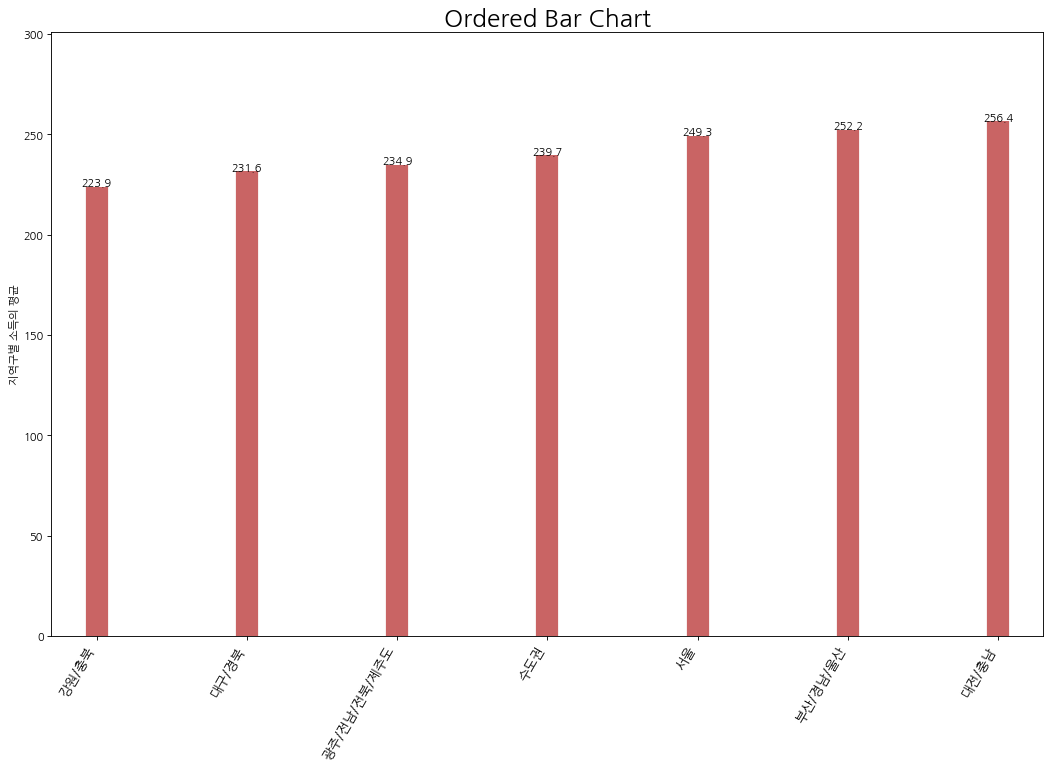

In [27]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.소득, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text : Bar의 상단에 수치 데이터를 보여 줍니다.
for i, income in enumerate(df.소득):
    ax.text(i, income+0.5, round(income, 1), horizontalalignment='center')

# 그래프 제목, y축 상하한선, c축 Ticks 정의
ax.set_title('Ordered Bar Chart', fontdict={'size':22})
ax.set(ylabel='지역구별 소득의 평균', ylim=(0, 301))
plt.xticks(df.index, df.지역구.str.lower(), rotation=60, horizontalalignment='right', fontsize=12)


df
            지역구  counts
0         강원/충북     617
1  광주/전남/전북/제주도    1346
2         대구/경북     887
3         대전/충남     715
4      부산/경남/울산    1230
5            서울    1098
6           수도권    1636
labels
0            강원/충북\n (617)
1    광주/전남/전북/제주도\n (1346)
2            대구/경북\n (887)
3            대전/충남\n (715)
4        부산/경남/울산\n (1230)
5              서울\n (1098)
6             수도권\n (1636)
dtype: object
sizes
[617, 1346, 887, 715, 1230, 1098, 1636]
colors
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0), (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0), (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0), (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0), (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0), (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0)]


(0.0, 100.0, 0.0, 100.0)

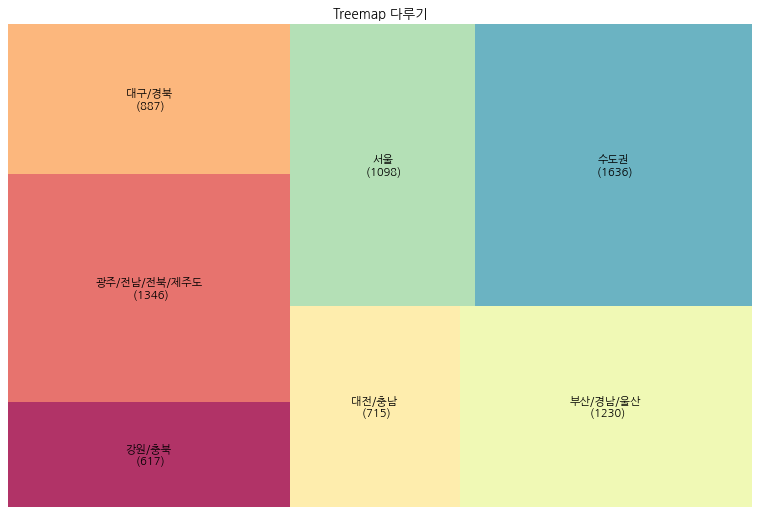

In [32]:
import squarify
df = welfare.groupby('지역구').size().reset_index(name='counts')
print('df')
print(df)

labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
print('labels') # 각 셀에 들어갈 레이블 텍스트
print(labels)

sizes = df['counts'].values.tolist()

print('sizes')
print(sizes)

colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

print('colors')
print(colors)

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap 다루기')
plt.axis('off')


newwelfare
0     120.0
1     220.2
2     139.0
3     150.0
4     166.0
      ...  
95    150.0
96    153.0
97     71.7
98     90.0
99    200.0
Name: 소득, Length: 100, dtype: float64


<StemContainer object of 3 artists>

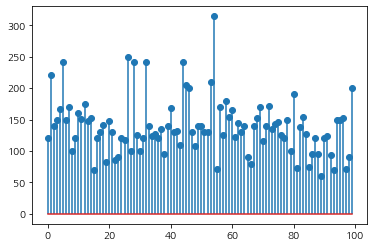

In [33]:
newwelfare = welfare['소득'].head(100)

print('newwelfare')
print(newwelfare)

plt.figure()
x = np.arange(len(newwelfare))
y = np.array(newwelfare)

plt.stem(x, y)